# Wrangling minimum wage data and deriving hours needed to afford college

In [7]:
import pandas as pd
import json

In [8]:
min_wage = pd.read_csv('../data/min-wage.csv', index_col='State').T
min_wage.index = min_wage.index.astype('int64')
min_wage.head()

State,Federal (FLSA),Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1968,1.6,1.6,2.1,1.6,1.6,1.65,1.25,1.40,1.25,1.6,...,1.6,1.6,1.6,1.15,1.4,1.6,1.6,1.0,1.25,1.2
1969,1.6,1.6,2.1,1.6,1.6,1.65,1.25,1.40,1.25,1.6,...,1.6,1.6,1.6,1.15,1.4,1.6,1.6,1.0,1.25,1.2
1970,1.6,1.6,2.1,1.6,1.1,1.65,1.25,1.60,1.25,1.6,...,1.0,1.6,1.6,1.15,1.6,1.6,1.6,1.0,1.30,1.3
1971,1.6,1.6,2.1,1.6,1.1,1.65,1.25,1.60,1.25,1.6,...,1.0,1.6,1.6,1.15,1.6,1.6,1.6,1.0,1.30,1.3
1972,1.6,1.6,2.1,1.6,1.2,1.65,1.25,1.85,1.60,1.6,...,1.0,1.6,1.4,1.35,1.6,1.6,1.6,1.2,1.45,1.5


In [9]:
all_cost_current = pd.read_json('../data/All-Current.json', orient='records')
all_cost_current.index = all_cost_current['Year']
all_cost_current.head()

,Board-2,Board-4,Board-All,Dorms-2,Dorms-4,Dorms-All,Total-2,Total-4,Total-All,Tuition-2,Tuition-4,Tuition-All,Year
Year,,,,,,,,,,,,,
1963,395.044960,454.937898,457.334166,209.139956,278.597813,282.340689,775.433503,1286.114126,1247.922549,171.248587,552.578415,508.247693,1963
1966,431.477170,471.882876,475.569528,279.972440,327.065841,328.486266,925.743434,1439.250028,1378.029556,214.293824,640.301311,573.973762,1966
1967,450.370807,483.472336,485.613271,301.329502,341.174294,341.988509,983.812370,1487.318021,1415.127765,232.112061,662.671391,587.525985,1967
1968,475.663160,501.845282,502.013997,326.882309,360.117907,360.264036,1052.943480,1545.252009,1458.609973,250.398012,683.288820,596.331940,1968
1969,495.018319,527.586644,525.670335,346.912636,391.873724,389.228228,1089.373133,1674.468407,1560.038913,247.442178,755.008039,645.140350,1969


In [10]:
all_cost_constant = pd.read_json('../data/All-Constant.json', orient='records')
all_cost_constant.index = all_cost_constant['Year']
all_cost_constant.head()

,Board-2,Board-4,Board-All,Dorms-2,Dorms-4,Dorms-All,Total-2,Total-4,Total-All,Tuition-2,Tuition-4,Tuition-All,Year
Year,,,,,,,,,,,,,
1963,3178.163729,3660.006516,3679.284657,1682.545256,2241.338463,2271.450158,6238.415583,10346.876133,10039.622279,1377.706598,4445.531154,4088.887464,1963
1966,3252.444158,3557.019490,3584.809208,2110.412298,2465.399000,2476.106063,6978.188028,10848.964137,10387.488583,1615.331572,4826.545648,4326.573312,1966
1967,3285.953505,3527.465798,3543.086290,2198.532230,2489.244085,2495.184685,7178.000122,10851.631123,10324.923309,1693.514386,4834.921240,4286.652333,1967
1968,3309.064322,3491.206504,3492.380210,2274.034816,2505.246190,2506.262771,7325.052682,10749.914487,10147.168479,1741.953544,4753.461792,4148.525498,1968
1969,3251.539787,3465.465619,3452.878293,2278.704029,2574.032020,2556.655018,7155.573739,10998.786178,10247.153284,1625.329924,4959.288539,4237.619973,1969


In [11]:
min_wage.index

Int64Index([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64')

In [12]:
all_cost_current.index

Int64Index([1963, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
            1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='Year')

In [13]:
min_wage.loc[1968]

State
Federal (FLSA)    1.60
Alabama           1.60
Alaska            2.10
Arizona           1.60
Arkansas          1.60
California        1.65
Colorado          1.25
Connecticut       1.40
Delaware          1.25
Florida           1.60
Georgia           1.60
Hawaii            1.25
Idaho             1.15
Illinois          1.60
Indiana           1.15
Iowa              1.60
Kansas            1.60
Kentucky          0.75
Louisiana         1.60
Maine             1.40
Maryland          1.15
Massachusetts     1.60
Michigan          1.25
Minnesota         1.15
Mississippi       1.60
Missouri          1.60
Montana           1.60
Nebraska          1.00
Nevada            1.25
New Hampshire     1.40
New Jersey        1.40
New Mexico        1.40
New York          1.60
North Carolina    1.00
North Dakota      1.25
Ohio              1.25
Oklahoma          1.00
Oregon            1.25
Pennsylvania      1.15
Rhode Island      1.40
South Carolina    1.60
South Dakota      1.60
Tennessee         1.60
Texas

In [14]:
all_cost_current.loc[1968]

Board-2         475.663160
Board-4         501.845282
Board-All       502.013997
Dorms-2         326.882309
Dorms-4         360.117907
Dorms-All       360.264036
Total-2        1052.943480
Total-4        1545.252009
Total-All      1458.609973
Tuition-2       250.398012
Tuition-4       683.288820
Tuition-All     596.331940
Year           1968.000000
Name: 1968, dtype: float64

The structure of the resulting hours-per week required dataset will be as follows:
```json
[
    {
    year: 1968,
    hours-per-week: [
        {
        state: Federal (FLSA),
        Board-2: ...
        Board-4: ...
        Board-All: ...
        Dorms-2: ...
        Dorms-4: ...
        Dorms-All: ...
        Total-2: ...
        Total-4: ...
        Total-All: ...
        Tuition-2: ...
        Tuition-4: ...
        Tuition-All: ...
        },
        {
        ...
        },
        ...
    ]
    },
    {
    year: 1969
    hours: [ ... ]
    },
    ...    
]
```

In [15]:
final_set = []
for year in range(1968, 2018):
    print(year)
    new_dict = dict()
    wages = min_wage.loc[year]
    costs = all_cost_current.loc[year]
    new_dict['year'] = year
    new_dict['hours'] = []
    for state, wage in wages.iteritems():
        cost_dict = dict()
        print(state)
        cost_dict['state'] = state
        for typ, cost in costs.iteritems():
            if typ == 'Year':
                continue
            print('\t', typ, ': ', cost/wage/7, ' hrs/week')
            cost_dict[typ] = cost/wage/7
        new_dict['hours'].append(cost_dict)    
        
    print()
    final_set.append(new_dict)

1968
Federal (FLSA)
	 Board-2 :  42.469924970490446  hrs/week
	 Board-4 :  44.807614445809286  hrs/week
	 Board-All :  44.82267827419446  hrs/week
	 Dorms-2 :  29.18592044324919  hrs/week
	 Dorms-4 :  32.153384575909016  hrs/week
	 Dorms-All :  32.16643180932134  hrs/week
	 Total-2 :  94.01281074844107  hrs/week
	 Total-4 :  137.96892937942144  hrs/week
	 Total-All :  130.23303329974553  hrs/week
	 Tuition-2 :  22.356965334701425  hrs/week
	 Tuition-4 :  61.007930357703394  hrs/week
	 Tuition-All :  53.24392321622937  hrs/week
Alabama
	 Board-2 :  42.469924970490446  hrs/week
	 Board-4 :  44.807614445809286  hrs/week
	 Board-All :  44.82267827419446  hrs/week
	 Dorms-2 :  29.18592044324919  hrs/week
	 Dorms-4 :  32.153384575909016  hrs/week
	 Dorms-All :  32.16643180932134  hrs/week
	 Total-2 :  94.01281074844107  hrs/week
	 Total-4 :  137.96892937942144  hrs/week
	 Total-All :  130.23303329974553  hrs/week
	 Tuition-2 :  22.356965334701425  hrs/week
	 Tuition-4 :  61.007930357703394  

	 Total-All :  193.79365377103605  hrs/week
	 Tuition-2 :  30.738158767310065  hrs/week
	 Tuition-4 :  93.78981844905691  hrs/week
	 Tuition-All :  80.14165839078039  hrs/week
Massachusetts
	 Board-2 :  44.19806420294241  hrs/week
	 Board-4 :  47.10595039866625  hrs/week
	 Board-All :  46.93485132528401  hrs/week
	 Dorms-2 :  30.974342485295715  hrs/week
	 Dorms-4 :  34.988725328778656  hrs/week
	 Dorms-All :  34.752520354274644  hrs/week
	 Total-2 :  97.26545830224197  hrs/week
	 Total-4 :  149.50610773770444  hrs/week
	 Total-All :  139.28918864793212  hrs/week
	 Tuition-2 :  22.093051614004107  hrs/week
	 Tuition-4 :  67.41143201025963  hrs/week
	 Tuition-All :  57.60181696837339  hrs/week
Michigan
	 Board-2 :  56.57352217976629  hrs/week
	 Board-4 :  60.2956165102928  hrs/week
	 Board-All :  60.07660969636354  hrs/week
	 Dorms-2 :  39.64715838117852  hrs/week
	 Dorms-4 :  44.78556842083668  hrs/week
	 Dorms-All :  44.48322605347154  hrs/week
	 Total-2 :  124.49978662686972  hrs/wee

	 Total-4 :  167.64157435419642  hrs/week
	 Total-All :  154.50797097162322  hrs/week
	 Tuition-2 :  22.394598035825624  hrs/week
	 Tuition-4 :  77.26213895710704  hrs/week
	 Tuition-All :  64.62588363421553  hrs/week
Alabama
	 Board-2 :  47.32163018944044  hrs/week
	 Board-4 :  50.34172953711392  hrs/week
	 Board-All :  50.15755854644044  hrs/week
	 Dorms-2 :  34.90212040018536  hrs/week
	 Dorms-4 :  40.03770585997553  hrs/week
	 Dorms-All :  39.72452879096732  hrs/week
	 Total-2 :  104.61834862545177  hrs/week
	 Total-4 :  167.64157435419642  hrs/week
	 Total-All :  154.50797097162322  hrs/week
	 Tuition-2 :  22.394598035825624  hrs/week
	 Tuition-4 :  77.26213895710704  hrs/week
	 Tuition-All :  64.62588363421553  hrs/week
Alaska
	 Board-2 :  36.05457538243082  hrs/week
	 Board-4 :  38.355603456848705  hrs/week
	 Board-All :  38.21528270204986  hrs/week
	 Dorms-2 :  26.592091733474557  hrs/week
	 Dorms-4 :  30.504918750457545  hrs/week
	 Dorms-All :  30.266307650260813  hrs/week
	 T

	 Total-2 :  113.92411923685623  hrs/week
	 Total-4 :  181.31583185718927  hrs/week
	 Total-All :  163.78392872836872  hrs/week
	 Tuition-2 :  25.61154987067643  hrs/week
	 Tuition-4 :  84.85187915615303  hrs/week
	 Tuition-All :  67.80834039361652  hrs/week
Nebraska
	 Board-2 :  82.03883527619371  hrs/week
	 Board-4 :  83.99524615396759  hrs/week
	 Board-All :  83.87803398036871  hrs/week
	 Dorms-2 :  59.261275709694715  hrs/week
	 Dorms-4 :  70.34707816769071  hrs/week
	 Dorms-All :  69.68290735523415  hrs/week
	 Total-2 :  182.27859077897  hrs/week
	 Total-4 :  290.10533097150284  hrs/week
	 Total-All :  262.05428596539  hrs/week
	 Tuition-2 :  40.978479793082286  hrs/week
	 Tuition-4 :  135.76300664984487  hrs/week
	 Tuition-All :  108.49334462978642  hrs/week
Nevada
	 Board-2 :  51.27427204762107  hrs/week
	 Board-4 :  52.49702884622973  hrs/week
	 Board-All :  52.423771237730435  hrs/week
	 Dorms-2 :  37.038297318559195  hrs/week
	 Dorms-4 :  43.96692385480669  hrs/week
	 Dorms-A

	 Dorms-2 :  41.0891649556008  hrs/week
	 Dorms-4 :  47.56097041304955  hrs/week
	 Dorms-All :  47.14534279438821  hrs/week
	 Total-2 :  127.81253507255983  hrs/week
	 Total-4 :  195.2320596628866  hrs/week
	 Total-All :  177.06153183078212  hrs/week
	 Tuition-2 :  29.25119521577241  hrs/week
	 Tuition-4 :  90.00731631281339  hrs/week
	 Tuition-All :  72.26472077013018  hrs/week
Arkansas
	 Board-2 :  76.62956653491501  hrs/week
	 Board-4 :  76.88503058269785  hrs/week
	 Board-All :  76.86862435501811  hrs/week
	 Dorms-2 :  54.78555327413441  hrs/week
	 Dorms-4 :  63.41462721739941  hrs/week
	 Dorms-All :  62.86045705918429  hrs/week
	 Total-2 :  170.4167134300798  hrs/week
	 Total-4 :  260.30941288384884  hrs/week
	 Total-All :  236.08204244104286  hrs/week
	 Tuition-2 :  39.00159362102988  hrs/week
	 Tuition-4 :  120.00975508375119  hrs/week
	 Tuition-All :  96.35296102684025  hrs/week
California
	 Board-2 :  55.730593843574546  hrs/week
	 Board-4 :  55.91638587832572  hrs/week
	 Boar

	 Board-All :  69.49115604453893  hrs/week
	 Dorms-2 :  46.69884756120788  hrs/week
	 Dorms-4 :  56.7569851717069  hrs/week
	 Dorms-All :  56.04909704031103  hrs/week
	 Total-2 :  145.16264561349263  hrs/week
	 Total-4 :  231.9998902970266  hrs/week
	 Total-All :  207.22110333662067  hrs/week
	 Tuition-2 :  29.281598025227982  hrs/week
	 Tuition-4 :  105.7283586569862  hrs/week
	 Tuition-All :  81.68085025177105  hrs/week
Ohio
	 Board-2 :  80.25135203138584  hrs/week
	 Board-4 :  80.6368739032665  hrs/week
	 Board-All :  80.60974101166515  hrs/week
	 Dorms-2 :  54.17066317100114  hrs/week
	 Dorms-4 :  65.83810279918  hrs/week
	 Dorms-All :  65.01695256676079  hrs/week
	 Total-2 :  168.38866891165142  hrs/week
	 Total-4 :  269.11987274455083  hrs/week
	 Total-All :  240.37647987047998  hrs/week
	 Tuition-2 :  33.966653709264456  hrs/week
	 Tuition-4 :  122.64489604210398  hrs/week
	 Tuition-All :  94.74978629205441  hrs/week
Oklahoma
	 Board-2 :  71.65299288516593  hrs/week
	 Board-4 : 

Kentucky
	 Board-2 :  71.47475380988223  hrs/week
	 Board-4 :  69.61520165519616  hrs/week
	 Board-All :  69.73271354487679  hrs/week
	 Dorms-2 :  46.85272410436097  hrs/week
	 Dorms-4 :  58.377417494461156  hrs/week
	 Dorms-All :  57.61397162741249  hrs/week
	 Total-2 :  152.09387269340536  hrs/week
	 Total-4 :  243.30334139908123  hrs/week
	 Total-All :  215.24565185471155  hrs/week
	 Tuition-2 :  33.76639477916196  hrs/week
	 Tuition-4 :  115.31072224942409  hrs/week
	 Tuition-All :  87.89896668242204  hrs/week
Louisiana
	 Board-2 :  49.72156786774416  hrs/week
	 Board-4 :  48.42796636883212  hrs/week
	 Board-All :  48.50971377034907  hrs/week
	 Dorms-2 :  32.59319937694677  hrs/week
	 Dorms-4 :  40.610377387451244  hrs/week
	 Dorms-All :  40.07928461037392  hrs/week
	 Total-2 :  105.80443317802113  hrs/week
	 Total-4 :  169.25449836457827  hrs/week
	 Total-All :  149.73610563806025  hrs/week
	 Tuition-2 :  23.489665933330063  hrs/week
	 Tuition-4 :  80.21615460829503  hrs/week
	 Tu

	 Board-All :  37.61312036188861  hrs/week
	 Dorms-2 :  26.385663728494958  hrs/week
	 Dorms-4 :  31.90164616147244  hrs/week
	 Dorms-All :  31.550659278292898  hrs/week
	 Total-2 :  83.16911407029538  hrs/week
	 Total-4 :  133.06947860667734  hrs/week
	 Total-All :  118.02177847485925  hrs/week
	 Tuition-2 :  18.94832239061244  hrs/week
	 Tuition-4 :  63.569009071861345  hrs/week
	 Tuition-All :  48.85799883467773  hrs/week
Arizona
	 Board-2 :  44.3584258738065  hrs/week
	 Board-4 :  44.08137912736798  hrs/week
	 Board-All :  44.098141113938375  hrs/week
	 Dorms-2 :  30.934916095476847  hrs/week
	 Dorms-4 :  37.40192998241596  hrs/week
	 Dorms-All :  36.99042811937788  hrs/week
	 Total-2 :  97.50861649620838  hrs/week
	 Total-4 :  156.01249215955272  hrs/week
	 Total-All :  138.37036097052464  hrs/week
	 Tuition-2 :  22.21527452692493  hrs/week
	 Tuition-4 :  74.52918304976848  hrs/week
	 Tuition-All :  57.28179173720837  hrs/week
Arkansas
	 Board-2 :  55.930189145234294  hrs/week
	 B

	 Board-4 :  69.63348820303422  hrs/week
	 Board-All :  69.74524387799549  hrs/week
	 Dorms-2 :  50.323770045731855  hrs/week
	 Dorms-4 :  60.420665522068354  hrs/week
	 Dorms-All :  59.72920931874893  hrs/week
	 Total-2 :  159.2963964761993  hrs/week
	 Total-4 :  249.95821727550356  hrs/week
	 Total-All :  221.51835887719716  hrs/week
	 Tuition-2 :  37.564089127576715  hrs/week
	 Tuition-4 :  119.90406355040143  hrs/week
	 Tuition-All :  92.04390568045287  hrs/week
Oregon
	 Board-2 :  49.24726710544202  hrs/week
	 Board-4 :  48.0230953124374  hrs/week
	 Board-All :  48.10016819172103  hrs/week
	 Dorms-2 :  34.70604830740128  hrs/week
	 Dorms-4 :  41.66942449797818  hrs/week
	 Dorms-All :  41.19255815086133  hrs/week
	 Total-2 :  109.85958377668918  hrs/week
	 Total-4 :  172.38497743138177  hrs/week
	 Total-All :  152.77128198427388  hrs/week
	 Tuition-2 :  25.90626836384601  hrs/week
	 Tuition-4 :  82.6924576209665  hrs/week
	 Tuition-All :  63.47855564169163  hrs/week
Pennsylvania
	 

	 Dorms-2 :  37.24547033291932  hrs/week
	 Dorms-4 :  45.965920259216624  hrs/week
	 Dorms-All :  45.357250918919824  hrs/week
	 Total-2 :  115.71171001420768  hrs/week
	 Total-4 :  187.88803321405754  hrs/week
	 Total-All :  165.31703000168613  hrs/week
	 Tuition-2 :  28.769124472405288  hrs/week
	 Tuition-4 :  91.23122347482261  hrs/week
	 Tuition-All :  69.33156232324946  hrs/week
Michigan
	 Board-2 :  49.69711520888315  hrs/week
	 Board-4 :  50.69088948001791  hrs/week
	 Board-All :  50.628216759517265  hrs/week
	 Dorms-2 :  37.24547033291932  hrs/week
	 Dorms-4 :  45.965920259216624  hrs/week
	 Dorms-All :  45.357250918919824  hrs/week
	 Total-2 :  115.71171001420768  hrs/week
	 Total-4 :  187.88803321405754  hrs/week
	 Total-All :  165.31703000168613  hrs/week
	 Tuition-2 :  28.769124472405288  hrs/week
	 Tuition-4 :  91.23122347482261  hrs/week
	 Tuition-All :  69.33156232324946  hrs/week
Minnesota
	 Board-2 :  53.70494708056727  hrs/week
	 Board-4 :  54.778864438083865  hrs/wee

	 Dorms-4 :  54.67495888628998  hrs/week
	 Dorms-All :  54.035013856441786  hrs/week
	 Total-2 :  135.58185346711983  hrs/week
	 Total-4 :  220.06306686917014  hrs/week
	 Total-All :  194.57164442297355  hrs/week
	 Tuition-2 :  35.01733580859279  hrs/week
	 Tuition-4 :  109.48627249669168  hrs/week
	 Tuition-All :  84.66108614359617  hrs/week
Georgia
	 Board-2 :  148.640695469456  hrs/week
	 Board-4 :  149.81691910298514  hrs/week
	 Board-All :  149.74645905346628  hrs/week
	 Dorms-2 :  120.87221185539657  hrs/week
	 Dorms-4 :  146.52888981525714  hrs/week
	 Dorms-All :  144.813837135264  hrs/week
	 Total-2 :  363.35936729188114  hrs/week
	 Total-4 :  589.769019209376  hrs/week
	 Total-All :  521.4520070535691  hrs/week
	 Tuition-2 :  93.84645996702868  hrs/week
	 Tuition-4 :  293.4232102911337  hrs/week
	 Tuition-All :  226.8917108648377  hrs/week
Hawaii
	 Board-2 :  59.935764302200006  hrs/week
	 Board-4 :  60.41004802539724  hrs/week
	 Board-All :  60.381636715107376  hrs/week
	 Dor

	 Dorms-2 :  112.95159647266838  hrs/week
	 Dorms-4 :  138.24668004614696  hrs/week
	 Dorms-All :  136.5557985944949  hrs/week
	 Total-2 :  343.56358551845005  hrs/week
	 Total-4 :  561.6495465474785  hrs/week
	 Total-All :  498.4359536059929  hrs/week
	 Tuition-2 :  90.65853757366673  hrs/week
	 Tuition-4 :  284.1183812246041  hrs/week
	 Tuition-All :  222.55559624031736  hrs/week
Utah
	 Board-2 :  71.2490298403496  hrs/week
	 Board-4 :  70.9084652317891  hrs/week
	 Board-All :  70.92886628351013  hrs/week
	 Dorms-2 :  57.50263093154026  hrs/week
	 Dorms-4 :  70.38012802349299  hrs/week
	 Dorms-All :  69.51931564810648  hrs/week
	 Total-2 :  174.90509808212002  hrs/week
	 Total-4 :  285.9306782423527  hrs/week
	 Total-All :  253.7492127448691  hrs/week
	 Tuition-2 :  46.15343731023034  hrs/week
	 Tuition-4 :  144.64208498707117  hrs/week
	 Tuition-All :  113.30103081325247  hrs/week
Vermont
	 Board-2 :  58.48800957043625  hrs/week
	 Board-4 :  58.208441608185076  hrs/week
	 Board-All 

	 Dorms-All :  77.27946037583584  hrs/week
	 Total-2 :  169.50522689009713  hrs/week
	 Total-4 :  325.83607381005925  hrs/week
	 Total-All :  285.42758827667734  hrs/week
	 Tuition-2 :  42.03675191647127  hrs/week
	 Tuition-4 :  166.27744059901246  hrs/week
	 Tuition-All :  127.68914322727531  hrs/week
New Hampshire
	 Board-2 :  61.26497795144093  hrs/week
	 Board-4 :  66.32281527325758  hrs/week
	 Board-All :  66.04842025442005  hrs/week
	 Dorms-2 :  43.37332240004307  hrs/week
	 Dorms-4 :  64.65815228804904  hrs/week
	 Dorms-All :  63.438362995089115  hrs/week
	 Total-2 :  139.14608177545287  hrs/week
	 Total-4 :  267.47737402318296  hrs/week
	 Total-All :  234.3062291823471  hrs/week
	 Tuition-2 :  34.50778142396895  hrs/week
	 Tuition-4 :  136.4964064618759  hrs/week
	 Tuition-All :  104.81944593283795  hrs/week
New Jersey
	 Board-2 :  61.26497795144093  hrs/week
	 Board-4 :  66.32281527325758  hrs/week
	 Board-All :  66.04842025442005  hrs/week
	 Dorms-2 :  43.37332240004307  hrs/

	 Total-2 :  330.7985497654393  hrs/week
	 Total-4 :  643.8893663216875  hrs/week
	 Total-All :  554.2159849008883  hrs/week
	 Tuition-2 :  87.30335515645866  hrs/week
	 Tuition-4 :  339.3023037080875  hrs/week
	 Tuition-All :  253.5036311591143  hrs/week
Kentucky
	 Board-2 :  69.18636359537952  hrs/week
	 Board-4 :  74.0602606762742  hrs/week
	 Board-All :  73.77687321598934  hrs/week
	 Dorms-2 :  47.10984875517825  hrs/week
	 Dorms-4 :  71.41415728843027  hrs/week
	 Dorms-All :  69.84693752635054  hrs/week
	 Total-2 :  157.99333720140385  hrs/week
	 Total-4 :  307.52924958647765  hrs/week
	 Total-All :  264.7001718929616  hrs/week
	 Tuition-2 :  41.697124850845924  hrs/week
	 Tuition-4 :  162.05483162177316  hrs/week
	 Tuition-All :  121.07636115062175  hrs/week
Louisiana
	 Board-2 :  69.18636359537952  hrs/week
	 Board-4 :  74.0602606762742  hrs/week
	 Board-All :  73.77687321598934  hrs/week
	 Dorms-2 :  47.10984875517825  hrs/week
	 Dorms-4 :  71.41415728843027  hrs/week
	 Dorms-A

	 Dorms-All :  108.2768778235671  hrs/week
	 Total-2 :  244.12094669971927  hrs/week
	 Total-4 :  472.14730957946773  hrs/week
	 Total-All :  407.5576511065671  hrs/week
	 Tuition-2 :  67.5451232424702  hrs/week
	 Tuition-4 :  249.00167574433416  hrs/week
	 Tuition-All :  187.34517490924472  hrs/week
West Virginia
	 Board-2 :  70.80793882365202  hrs/week
	 Board-4 :  77.22025510936588  hrs/week
	 Board-All :  76.85130634615992  hrs/week
	 Dorms-2 :  50.423223549981664  hrs/week
	 Dorms-4 :  75.98420991177058  hrs/week
	 Dorms-All :  74.33934895349383  hrs/week
	 Total-2 :  167.60542609234454  hrs/week
	 Total-4 :  324.16083941276884  hrs/week
	 Total-All :  279.8157007597326  hrs/week
	 Tuition-2 :  46.37426371871088  hrs/week
	 Tuition-4 :  170.9563743916324  hrs/week
	 Tuition-All :  128.62504546007847  hrs/week
Wisconsin
	 Board-2 :  70.80793882365202  hrs/week
	 Board-4 :  77.22025510936588  hrs/week
	 Board-All :  76.85130634615992  hrs/week
	 Dorms-2 :  50.423223549981664  hrs/we

	 Total-2 :  141.42686909911598  hrs/week
	 Total-4 :  294.372702619359  hrs/week
	 Total-All :  250.50227198072068  hrs/week
	 Tuition-2 :  42.879305857922354  hrs/week
	 Tuition-4 :  159.72918996971632  hrs/week
	 Tuition-All :  118.22337681203024  hrs/week
Oklahoma
	 Board-2 :  56.863972626529076  hrs/week
	 Board-4 :  67.72128950422588  hrs/week
	 Board-All :  67.10884995469479  hrs/week
	 Dorms-2 :  41.68359061466454  hrs/week
	 Dorms-4 :  66.9222231454168  hrs/week
	 Dorms-All :  65.17004521399564  hrs/week
	 Total-2 :  141.42686909911598  hrs/week
	 Total-4 :  294.372702619359  hrs/week
	 Total-All :  250.50227198072068  hrs/week
	 Tuition-2 :  42.879305857922354  hrs/week
	 Tuition-4 :  159.72918996971632  hrs/week
	 Tuition-All :  118.22337681203024  hrs/week
Oregon
	 Board-2 :  50.87829129742075  hrs/week
	 Board-4 :  60.59273271430737  hrs/week
	 Board-All :  60.04476048577955  hrs/week
	 Dorms-2 :  37.295844234173536  hrs/week
	 Dorms-4 :  59.87777860379398  hrs/week
	 Dorm

	 Dorms-All :  72.11172915366656  hrs/week
	 Total-2 :  155.7412322779489  hrs/week
	 Total-4 :  326.9896478021065  hrs/week
	 Total-All :  279.1769533880682  hrs/week
	 Tuition-2 :  50.0039386404158  hrs/week
	 Tuition-4 :  181.20569110941946  hrs/week
	 Tuition-All :  135.94867432742151  hrs/week
Mississippi
	 Board-2 :  58.81485246097479  hrs/week
	 Board-4 :  71.85111606087966  hrs/week
	 Board-All :  71.11654990698017  hrs/week
	 Dorms-2 :  46.922441176558316  hrs/week
	 Dorms-4 :  73.93284063180772  hrs/week
	 Dorms-All :  72.11172915366656  hrs/week
	 Total-2 :  155.7412322779489  hrs/week
	 Total-4 :  326.9896478021065  hrs/week
	 Total-All :  279.1769533880682  hrs/week
	 Tuition-2 :  50.0039386404158  hrs/week
	 Tuition-4 :  181.20569110941946  hrs/week
	 Tuition-All :  135.94867432742151  hrs/week
Missouri
	 Board-2 :  58.81485246097479  hrs/week
	 Board-4 :  71.85111606087966  hrs/week
	 Board-All :  71.11654990698017  hrs/week
	 Dorms-2 :  46.922441176558316  hrs/week
	 Do

	 Board-4 :  101.12695027678463  hrs/week
	 Board-All :  100.05701428936527  hrs/week
	 Dorms-2 :  66.9225389423921  hrs/week
	 Dorms-4 :  106.44274892492483  hrs/week
	 Dorms-All :  103.97213290269231  hrs/week
	 Total-2 :  215.17266407430154  hrs/week
	 Total-4 :  476.5127496256308  hrs/week
	 Total-All :  404.64979135928127  hrs/week
	 Tuition-2 :  67.82451339231692  hrs/week
	 Tuition-4 :  268.94305042392176  hrs/week
	 Tuition-All :  200.62064416722416  hrs/week
Hawaii
	 Board-2 :  49.787283457842996  hrs/week
	 Board-4 :  62.60239779039048  hrs/week
	 Board-All :  61.94005646484517  hrs/week
	 Dorms-2 :  41.42823839290939  hrs/week
	 Dorms-4 :  65.89313028685822  hrs/week
	 Dorms-All :  64.36370132071428  hrs/week
	 Total-2 :  133.20212537932952  hrs/week
	 Total-4 :  294.98408310158095  hrs/week
	 Total-All :  250.4974898890789  hrs/week
	 Tuition-2 :  41.98660352857714  hrs/week
	 Tuition-4 :  166.48855502433253  hrs/week
	 Tuition-All :  124.19373210351974  hrs/week
Idaho
	 Bo

	 Tuition-2 :  56.958723204702856  hrs/week
	 Tuition-4 :  213.46227261083294  hrs/week
	 Tuition-All :  159.82474544323426  hrs/week
Oklahoma
	 Board-2 :  57.133263184659846  hrs/week
	 Board-4 :  72.7659516518033  hrs/week
	 Board-All :  71.84180419476843  hrs/week
	 Dorms-2 :  48.054710382618644  hrs/week
	 Dorms-4 :  75.40321206212481  hrs/week
	 Dorms-All :  73.5034866624821  hrs/week
	 Total-2 :  156.1510416978018  hrs/week
	 Total-4 :  339.1617234183579  hrs/week
	 Total-All :  288.34637888540755  hrs/week
	 Tuition-2 :  50.96306813052361  hrs/week
	 Tuition-4 :  190.99255970442945  hrs/week
	 Tuition-All :  143.00108802815697  hrs/week
Oregon
	 Board-2 :  49.34236365947896  hrs/week
	 Board-4 :  62.84332188110285  hrs/week
	 Board-All :  62.04519453184546  hrs/week
	 Dorms-2 :  41.50179533044338  hrs/week
	 Dorms-4 :  65.12095587183506  hrs/week
	 Dorms-All :  63.48028393578  hrs/week
	 Total-2 :  134.85771782991975  hrs/week
	 Total-4 :  292.9123974976727  hrs/week
	 Total-All

	 Total-4 :  342.5542711167406  hrs/week
	 Total-All :  289.32668467034676  hrs/week
	 Tuition-2 :  47.92866746245769  hrs/week
	 Tuition-4 :  195.29510436836446  hrs/week
	 Tuition-All :  144.84896746263078  hrs/week
Minnesota
	 Board-2 :  53.26799234936005  hrs/week
	 Board-4 :  70.95900328799972  hrs/week
	 Board-All :  69.97256584531401  hrs/week
	 Dorms-2 :  49.13776720151012  hrs/week
	 Dorms-4 :  76.3001634603753  hrs/week
	 Dorms-All :  74.50515136240082  hrs/week
	 Total-2 :  150.33442701332788  hrs/week
	 Total-4 :  342.5542711167406  hrs/week
	 Total-All :  289.32668467034676  hrs/week
	 Tuition-2 :  47.92866746245769  hrs/week
	 Tuition-4 :  195.29510436836446  hrs/week
	 Tuition-All :  144.84896746263078  hrs/week
Mississippi
	 Board-2 :  53.26799234936005  hrs/week
	 Board-4 :  70.95900328799972  hrs/week
	 Board-All :  69.97256584531401  hrs/week
	 Dorms-2 :  49.13776720151012  hrs/week
	 Dorms-4 :  76.3001634603753  hrs/week
	 Dorms-All :  74.50515136240082  hrs/week
	 

	 Total-All :  500.23138440726154  hrs/week
	 Tuition-2 :  79.10929217757055  hrs/week
	 Tuition-4 :  342.2436580149064  hrs/week
	 Tuition-All :  248.19773441789235  hrs/week
Hawaii
	 Board-2 :  56.328567504219855  hrs/week
	 Board-4 :  76.00152809123891  hrs/week
	 Board-All :  74.90279969038802  hrs/week
	 Dorms-2 :  50.287353932971975  hrs/week
	 Dorms-4 :  83.26656154997497  hrs/week
	 Dorms-All :  81.11803125541117  hrs/week
	 Total-2 :  155.58834040425904  hrs/week
	 Total-4 :  371.13321126948847  hrs/week
	 Total-All :  309.66704749020954  hrs/week
	 Tuition-2 :  48.97241896706748  hrs/week
	 Tuition-4 :  211.86512162827538  hrs/week
	 Tuition-All :  153.64621654440953  hrs/week
Idaho
	 Board-2 :  57.4223260965348  hrs/week
	 Board-4 :  77.47728591825326  hrs/week
	 Board-All :  76.35722298534701  hrs/week
	 Dorms-2 :  51.26380740739861  hrs/week
	 Dorms-4 :  84.88338798783855  hrs/week
	 Dorms-All :  82.69313865842885  hrs/week
	 Total-2 :  158.6094732276427  hrs/week
	 Total-

	 Tuition-4 :  230.472416515056  hrs/week
	 Tuition-All :  166.49626411216835  hrs/week
Wyoming
	 Board-2 :  63.01869321357585  hrs/week
	 Board-4 :  79.53889650916337  hrs/week
	 Board-All :  78.56637797191179  hrs/week
	 Dorms-2 :  57.6156293944269  hrs/week
	 Dorms-4 :  90.51775336798003  hrs/week
	 Dorms-All :  88.18339271042855  hrs/week
	 Total-2 :  173.42935731073092  hrs/week
	 Total-4 :  400.5290663921997  hrs/week
	 Total-All :  333.2460347945076  hrs/week
	 Tuition-2 :  52.79503470272816  hrs/week
	 Tuition-4 :  230.472416515056  hrs/week
	 Tuition-All :  166.49626411216835  hrs/week

2003
Federal (FLSA)
	 Board-2 :  64.42101118533176  hrs/week
	 Board-4 :  84.00547858754702  hrs/week
	 Board-All :  82.83519695182136  hrs/week
	 Dorms-2 :  61.2508261306269  hrs/week
	 Dorms-4 :  95.64929979148293  hrs/week
	 Dorms-All :  93.18317418011817  hrs/week
	 Total-2 :  185.9903306998327  hrs/week
	 Total-4 :  430.1073922371623  hrs/week
	 Total-All :  359.31983238488766  hrs/week
	 

	 Tuition-All :  144.31823429428147  hrs/week
Pennsylvania
	 Board-2 :  66.67900403695033  hrs/week
	 Board-4 :  87.15011217865076  hrs/week
	 Board-All :  85.98156328158612  hrs/week
	 Dorms-2 :  65.28808232189043  hrs/week
	 Dorms-4 :  101.58146700266877  hrs/week
	 Dorms-All :  99.07192660265659  hrs/week
	 Total-2 :  196.81742982735562  hrs/week
	 Total-4 :  457.96467516973365  hrs/week
	 Total-All :  382.6153445977725  hrs/week
	 Tuition-2 :  64.85034346851484  hrs/week
	 Tuition-4 :  269.23309598841445  hrs/week
	 Tuition-All :  197.56185471353092  hrs/week
Rhode Island
	 Board-2 :  50.873610487451  hrs/week
	 Board-4 :  66.492307810378  hrs/week
	 Board-All :  65.60074828150645  hrs/week
	 Dorms-2 :  49.81238873447937  hrs/week
	 Dorms-4 :  77.50289704648063  hrs/week
	 Dorms-All :  75.58821066721207  hrs/week
	 Total-2 :  150.1644094238343  hrs/week
	 Total-4 :  349.4100854998709  hrs/week
	 Total-All :  291.9213369894116  hrs/week
	 Tuition-2 :  49.47841020190391  hrs/week
	 T

	 Tuition-4 :  303.20929398237166  hrs/week
	 Tuition-All :  224.4941291023201  hrs/week
Louisiana
	 Board-2 :  67.76581545145103  hrs/week
	 Board-4 :  95.03172857605215  hrs/week
	 Board-All :  93.59278877813425  hrs/week
	 Dorms-2 :  70.12319203662052  hrs/week
	 Dorms-4 :  114.17578910565132  hrs/week
	 Dorms-All :  111.47100172120749  hrs/week
	 Total-2 :  207.1250168289259  hrs/week
	 Total-4 :  512.4168116640749  hrs/week
	 Total-All :  429.5579196016616  hrs/week
	 Tuition-2 :  69.2360093408541  hrs/week
	 Tuition-4 :  303.20929398237166  hrs/week
	 Tuition-All :  224.4941291023201  hrs/week
Maine
	 Board-2 :  53.69137685768813  hrs/week
	 Board-4 :  75.29436956410287  hrs/week
	 Board-All :  74.15428649344484  hrs/week
	 Dorms-2 :  55.55914445978396  hrs/week
	 Dorms-4 :  90.46235598370835  hrs/week
	 Dorms-All :  88.3193321329567  hrs/week
	 Total-2 :  164.1067441029182  hrs/week
	 Total-4 :  405.99178154922856  hrs/week
	 Total-All :  340.34204399208573  hrs/week
	 Tuition-2

Colorado
	 Board-2 :  57.384509341352874  hrs/week
	 Board-4 :  76.48839116869352  hrs/week
	 Board-All :  75.43728803490355  hrs/week
	 Dorms-2 :  56.613844018925526  hrs/week
	 Dorms-4 :  92.7354702050397  hrs/week
	 Dorms-All :  90.4735440492957  hrs/week
	 Total-2 :  167.25399735835734  hrs/week
	 Total-4 :  414.35339543368747  hrs/week
	 Total-All :  346.8675757146683  hrs/week
	 Tuition-2 :  53.25564399807895  hrs/week
	 Tuition-4 :  245.12953405995523  hrs/week
	 Tuition-All :  180.95674363046905  hrs/week
Connecticut
	 Board-2 :  52.658726219123814  hrs/week
	 Board-4 :  70.18934719009523  hrs/week
	 Board-All :  69.22480549085266  hrs/week
	 Dorms-2 :  51.95152745266107  hrs/week
	 Dorms-4 :  85.0984314822717  hrs/week
	 Dorms-All :  83.02278159817722  hrs/week
	 Total-2 :  153.48013875237498  hrs/week
	 Total-4 :  380.2301746332661  hrs/week
	 Total-All :  318.30201065581326  hrs/week
	 Tuition-2 :  48.8698850805901  hrs/week
	 Tuition-4 :  224.9423959609001  hrs/week
	 Tuiti

	 Board-4 :  69.78148630516377  hrs/week
	 Board-All :  68.36411222437043  hrs/week
	 Dorms-2 :  53.06290844465827  hrs/week
	 Dorms-4 :  84.80380181149397  hrs/week
	 Dorms-All :  82.56116588321889  hrs/week
	 Total-2 :  151.38173225752533  hrs/week
	 Total-4 :  374.43888863833035  hrs/week
	 Total-All :  312.82847295470935  hrs/week
	 Tuition-2 :  51.81137079593797  hrs/week
	 Tuition-4 :  219.85360052167314  hrs/week
	 Tuition-All :  161.90319484712035  hrs/week
Virginia
	 Board-2 :  57.22901852159521  hrs/week
	 Board-4 :  85.86851597246107  hrs/week
	 Board-All :  84.12438847762225  hrs/week
	 Dorms-2 :  65.29573161281614  hrs/week
	 Dorms-4 :  104.35399123673916  hrs/week
	 Dorms-All :  101.59435068988464  hrs/week
	 Total-2 :  186.28042167872584  hrs/week
	 Total-4 :  460.75991487403707  hrs/week
	 Total-All :  384.94618198701636  hrs/week
	 Tuition-2 :  63.7556715443145  hrs/week
	 Tuition-4 :  270.53740766483753  hrs/week
	 Tuition-All :  199.22744281950995  hrs/week
Washingto

	 Total-2 :  184.16902223998207  hrs/week
	 Total-4 :  453.4116075170601  hrs/week
	 Total-All :  382.2916749373103  hrs/week
	 Tuition-2 :  63.924461781227386  hrs/week
	 Tuition-4 :  267.428359025064  hrs/week
	 Tuition-All :  200.5633060002621  hrs/week
North Carolina
	 Board-2 :  57.16736167316276  hrs/week
	 Board-4 :  83.0486872065736  hrs/week
	 Board-All :  81.53309784913675  hrs/week
	 Dorms-2 :  63.07719878559192  hrs/week
	 Dorms-4 :  102.93456128542287  hrs/week
	 Dorms-All :  100.19527108791192  hrs/week
	 Total-2 :  184.16902223998207  hrs/week
	 Total-4 :  453.4116075170601  hrs/week
	 Total-All :  382.2916749373103  hrs/week
	 Tuition-2 :  63.924461781227386  hrs/week
	 Tuition-4 :  267.428359025064  hrs/week
	 Tuition-All :  200.5633060002621  hrs/week
North Dakota
	 Board-2 :  57.16736167316276  hrs/week
	 Board-4 :  83.0486872065736  hrs/week
	 Board-All :  81.53309784913675  hrs/week
	 Dorms-2 :  63.07719878559192  hrs/week
	 Dorms-4 :  102.93456128542287  hrs/week


	 Total-All :  413.6911981713221  hrs/week
	 Tuition-2 :  66.38574120105814  hrs/week
	 Tuition-4 :  286.9465621919251  hrs/week
	 Tuition-All :  218.18424959639998  hrs/week
Louisiana
	 Board-2 :  58.73117203308177  hrs/week
	 Board-4 :  88.36220910441223  hrs/week
	 Board-All :  86.73902747242009  hrs/week
	 Dorms-2 :  69.78092322455586  hrs/week
	 Dorms-4 :  111.40498691011054  hrs/week
	 Dorms-All :  108.76792110250365  hrs/week
	 Total-2 :  194.89783645869596  hrs/week
	 Total-4 :  486.7137582064473  hrs/week
	 Total-All :  413.6911981713221  hrs/week
	 Tuition-2 :  66.38574120105814  hrs/week
	 Tuition-4 :  286.9465621919251  hrs/week
	 Tuition-All :  218.18424959639998  hrs/week
Maine
	 Board-2 :  56.773466298645715  hrs/week
	 Board-4 :  85.41680213426514  hrs/week
	 Board-All :  83.84772655667277  hrs/week
	 Dorms-2 :  67.454892450404  hrs/week
	 Dorms-4 :  107.69148734644018  hrs/week
	 Dorms-All :  105.1423237324202  hrs/week
	 Total-2 :  188.40124191007274  hrs/week
	 Total

	 Board-All :  91.86150870618324  hrs/week
	 Dorms-2 :  75.84536113910167  hrs/week
	 Dorms-4 :  119.06463159539054  hrs/week
	 Dorms-All :  116.55400047479645  hrs/week
	 Total-2 :  205.07257258987585  hrs/week
	 Total-4 :  514.9233736878779  hrs/week
	 Total-All :  442.14565011501674  hrs/week
	 Tuition-2 :  67.2253668094272  hrs/week
	 Tuition-4 :  302.32415320978527  hrs/week
	 Tuition-All :  233.73014093403745  hrs/week
Alaska
	 Board-2 :  51.37295698854416  hrs/week
	 Board-4 :  77.50008793138204  hrs/week
	 Board-All :  76.11382149940899  hrs/week
	 Dorms-2 :  62.84329922954139  hrs/week
	 Dorms-4 :  98.65355189332358  hrs/week
	 Dorms-All :  96.57331467911706  hrs/week
	 Total-2 :  169.91727443161145  hrs/week
	 Total-4 :  426.6507953413844  hrs/week
	 Total-All :  366.34925295244244  hrs/week
	 Tuition-2 :  55.701018213525394  hrs/week
	 Tuition-4 :  250.4971555166792  hrs/week
	 Tuition-All :  193.66211677391672  hrs/week
Arizona
	 Board-2 :  55.84017063972191  hrs/week
	 Boa

	 Board-4 :  95.55999047196335  hrs/week
	 Board-All :  93.9024810345263  hrs/week
	 Dorms-2 :  77.47242637761065  hrs/week
	 Dorms-4 :  122.77436163128847  hrs/week
	 Dorms-All :  120.32840563801791  hrs/week
	 Total-2 :  208.8173502737872  hrs/week
	 Total-4 :  523.9850946676493  hrs/week
	 Total-All :  454.99782867427194  hrs/week
	 Tuition-2 :  69.33714395857675  hrs/week
	 Tuition-4 :  305.65074256439806  hrs/week
	 Tuition-All :  240.76694200172807  hrs/week
Rhode Island
	 Board-2 :  46.828792140375  hrs/week
	 Board-4 :  72.16770113768065  hrs/week
	 Board-All :  70.91593619794955  hrs/week
	 Dorms-2 :  58.50782200392471  hrs/week
	 Dorms-4 :  92.7202210236293  hrs/week
	 Dorms-All :  90.87301467454479  hrs/week
	 Total-2 :  157.7006030713497  hrs/week
	 Total-4 :  395.7179100354643  hrs/week
	 Total-All :  343.6181518633825  hrs/week
	 Tuition-2 :  52.36398892705015  hrs/week
	 Tuition-4 :  230.82998787415477  hrs/week
	 Tuition-All :  181.8292009908884  hrs/week
South Carolina

In [16]:
final_set

[{'year': 1968,
  'hours': [{'state': 'Federal (FLSA)',
    'Board-2': 42.469924970490446,
    'Board-4': 44.807614445809286,
    'Board-All': 44.82267827419446,
    'Dorms-2': 29.18592044324919,
    'Dorms-4': 32.153384575909016,
    'Dorms-All': 32.16643180932134,
    'Total-2': 94.01281074844107,
    'Total-4': 137.96892937942144,
    'Total-All': 130.23303329974553,
    'Tuition-2': 22.356965334701425,
    'Tuition-4': 61.007930357703394,
    'Tuition-All': 53.24392321622937},
   {'state': 'Alabama',
    'Board-2': 42.469924970490446,
    'Board-4': 44.807614445809286,
    'Board-All': 44.82267827419446,
    'Dorms-2': 29.18592044324919,
    'Dorms-4': 32.153384575909016,
    'Dorms-All': 32.16643180932134,
    'Total-2': 94.01281074844107,
    'Total-4': 137.96892937942144,
    'Total-All': 130.23303329974553,
    'Tuition-2': 22.356965334701425,
    'Tuition-4': 61.007930357703394,
    'Tuition-All': 53.24392321622937},
   {'state': 'Alaska',
    'Board-2': 32.358038072754624,
  

In [17]:
with open('../data/current_hours.json', 'w') as fp:
    json.dump(final_set, fp)


In [58]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

import numpy as np

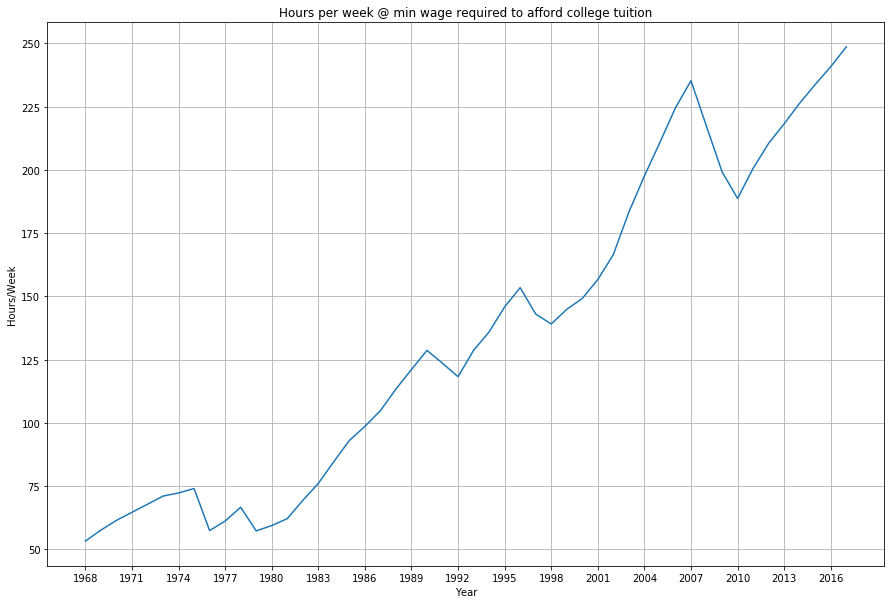

In [64]:
plt.plot([item['year'] for item in final_set], [item['hours'][0]['Tuition-All'] for item in final_set])
plt.title('Hours per week @ min wage required to afford college tuition')
plt.xlabel('Year')
plt.ylabel('Hours/Week')
plt.xticks(np.arange(1968, 2017, 3))
plt.grid()
plt.show()

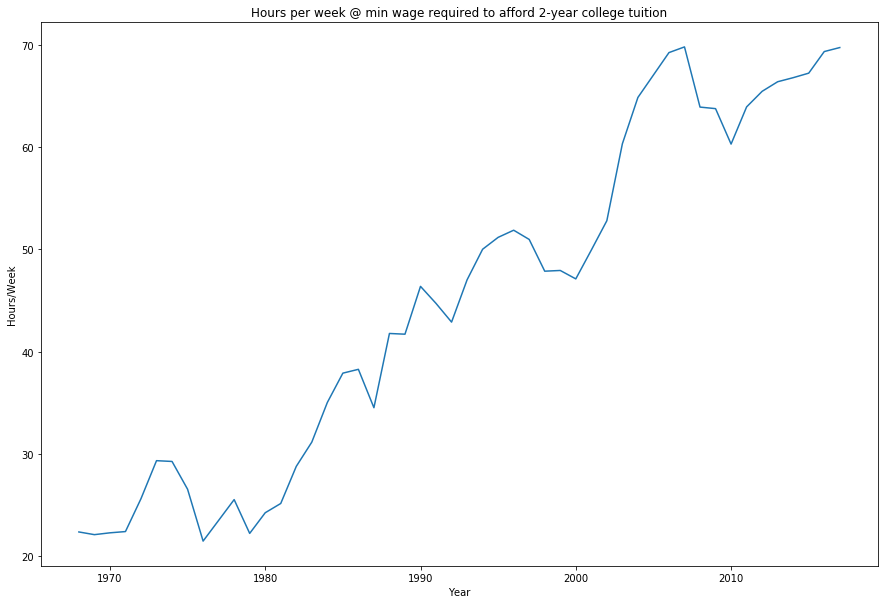

In [53]:
plt.plot([item['year'] for item in final_set], [item['hours'][0]['Tuition-2'] for item in final_set])
plt.title('Hours per week @ min wage required to afford 2-year college tuition')
plt.xlabel('Year')
plt.ylabel('Hours/Week')
plt.show()